In [259]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re
import fileinput, glob, os
import datetime
import missingno as msno
import seaborn as sns

In [308]:
connections = pd.read_csv('transactions/download_bank_connections.csv')
connections.head()

,icij_sar_id,filer_org_name_id,filer_org_name,entity_b_id,entity_b,entity_b_country,entity_b_iso_code
0,4132,standard-chartered-plc,Standard Chartered Plc,habib-metropolitan-bank-limited-karachi-pakist...,Habib Metropolitan Bank Limited,Pakistan,PAK
1,3181,standard-chartered-plc,Standard Chartered Plc,standard-chartered-bank-dubai-uae-are,Standard Chartered Bank,United Arab Emirates,ARE
2,3181,standard-chartered-plc,Standard Chartered Plc,al-rostamani-international-exchange-uae-are,Al Rostamani International Exchange,United Arab Emirates,ARE
3,3181,standard-chartered-plc,Standard Chartered Plc,kuwait-turkish-participation-bank-inc-istanbul...,Kuwait Turkish Participation Bank Inc,Turkey,TUR
4,3181,standard-chartered-plc,Standard Chartered Plc,wall-street-exchange-center-llc-dubai-uae-are,Wall Street Exchange Center Llc,United Arab Emirates,ARE


In [362]:
mapp = pd.read_csv('transactions/download_transactions_map.csv',index_col=0)
mapp['begin_date'] = pd.to_datetime(mapp['begin_date'], format='%b %d, %Y')
mapp['end_date'] = pd.to_datetime(mapp['end_date'], format='%b %d, %Y')
mapp.head(16)

,icij_sar_id,filer_org_name_id,filer_org_name,begin_date,end_date,originator_bank_id,originator_bank,originator_bank_country,originator_iso,beneficiary_bank_id,beneficiary_bank,beneficiary_bank_country,beneficiary_iso,number_transactions,amount_transactions
id,,,,,,,,,,,,,,,
223254,3297,the-bank-of-new-york-mellon-corp,The Bank of New York Mellon Corp.,2015-03-25,2015-09-25,cimb-bank-berhad,CIMB Bank Berhad,Singapore,SGP,barclays-bank-plc-london-england-gbr,Barclays Bank Plc,United Kingdom,GBR,68.0,5.689852e+07
223255,3297,the-bank-of-new-york-mellon-corp,The Bank of New York Mellon Corp.,2015-03-30,2015-09-25,cimb-bank-berhad,CIMB Bank Berhad,Singapore,SGP,barclays-bank-plc-london-england-gbr,Barclays Bank Plc,United Kingdom,GBR,118.0,1.162384e+08
223258,2924,the-bank-of-new-york-mellon-corp,The Bank of New York Mellon Corp.,2012-07-05,2012-07-05,barclays-bank-plc-ho-uk,Barclays Bank Plc Ho UK,United Kingdom,GBR,skandinaviska-enskilda-banken-stockholm-sweden...,Skandinaviska Enskilda Banken,Sweden,SWE,NaN,5.000000e+03
223259,2924,the-bank-of-new-york-mellon-corp,The Bank of New York Mellon Corp.,2012-06-20,2012-06-20,barclays-bank-plc-ho-uk,Barclays Bank Plc Ho UK,United Kingdom,GBR,skandinaviska-enskilda-banken-stockholm-sweden...,Skandinaviska Enskilda Banken,Sweden,SWE,NaN,9.990000e+03
223260,2924,the-bank-of-new-york-mellon-corp,The Bank of New York Mellon Corp.,2012-05-31,2012-05-31,barclays-bank-plc-ho-uk,Barclays Bank Plc Ho UK,United Kingdom,GBR,skandinaviska-enskilda-banken-stockholm-sweden...,Skandinaviska Enskilda Banken,Sweden,SWE,NaN,1.200000e+04
223261,2924,the-bank-of-new-york-mellon-corp,The Bank of New York Mellon Corp.,2012-05-29,2012-05-29,barclays-bank-plc-ho-uk,Barclays Bank Plc Ho UK,United Kingdom,GBR,skandinaviska-enskilda-banken-stockholm-sweden...,Skandinaviska Enskilda Banken,Sweden,SWE,NaN,8.803000e+01
223262,2924,the-bank-of-new-york-mellon-corp,The Bank of New York Mellon Corp.,2012-05-29,2012-05-29,barclays-bank-plc-ho-uk,Barclays Bank Plc Ho UK,United Kingdom,GBR,skandinaviska-enskilda-banken-stockholm-sweden...,Skandinaviska Enskilda Banken,Sweden,SWE,NaN,1.300000e+04
223263,2924,the-bank-of-new-york-mellon-corp,The Bank of New York Mellon Corp.,2012-05-22,2012-05-22,barclays-bank-plc-ho-uk,Barclays Bank Plc Ho UK,United Kingdom,GBR,skandinaviska-enskilda-banken-stockholm-sweden...,Skandinaviska Enskilda Banken,Sweden,SWE,NaN,6.990000e+03
223264,2924,the-bank-of-new-york-mellon-corp,The Bank of New York Mellon Corp.,2012-05-21,2012-05-21,barclays-bank-plc-ho-uk,Barclays Bank Plc Ho UK,United Kingdom,GBR,skandinaviska-enskilda-banken-stockholm-sweden...,Skandinaviska Enskilda Banken,Sweden,SWE,NaN,8.000000e+03


In [156]:
#before importing data from btc-tx.csv I had to correct some rows in text editor and replace double quotes
#and missing/incorrect transaction amounts taken from blockchain.com according to hash id
parser = lambda date: datetime.datetime.strptime(date, '%Y-%m-%d')

btctx = pd.read_csv('btctx.csv', parse_dates=[0], date_parser=parser, dtype={'Transaction_amount_BTC':'float'})
btctx.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 380401 entries, 0 to 380400
Data columns (total 5 columns):
 #   Column                  Non-Null Count   Dtype         
---  ------                  --------------   -----         
 0   time                    380401 non-null  datetime64[ns]
 1   Hash                    380401 non-null  object        
 2   Sender                  380401 non-null  object        
 3   Receiver                380401 non-null  object        
 4   Transaction_amount_BTC  380401 non-null  float64       
dtypes: datetime64[ns](1), float64(1), object(3)
memory usage: 14.5+ MB


In [162]:
#combine all rates in one dataframe
path = '/Users/koytoora/JupyterProjects/DataScience/Skillbox/HomeWork/Challenge/btc_usd'
pattern = '*.csv'
glob_path = os.path.join(path, pattern)
list_files = glob.glob(glob_path)
new_file = 'btc_usd.csv'

if list_files:
    with fileinput.FileInput(files=list_files) as fr, open(new_file, 'w') as fw:
        for line in fr:
            if not fr.isfirstline():
                fw.write(line)
            else:
                fw.write(f'\n')

parser = lambda date: datetime.datetime.strptime(date, '%d.%m.%Y')                
btcusd = pd.read_csv('btc_usd.csv', header=None, names=["time","rate"], parse_dates=[0], date_parser=parser)
btcusd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1096 entries, 0 to 1095
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   time    1096 non-null   datetime64[ns]
 1   rate    1096 non-null   float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 17.2 KB


In [378]:
#merge rates and bitcoin transaction to have USD amounts
dataset = btctx.merge(btcusd, how='left', on='time')
dataset['USD'] = dataset.Transaction_amount_BTC * dataset.rate
dataset[dataset.rate == ''].size
#calculate apprx number of senders for each transaction
dataset['sender_lenght'] = [len(i) for i in dataset.Sender]
dataset['senders'] = [int(i) for i in (round(dataset.sender_lenght/34,0))]
dataset['receiver_lenght'] = [len(i) for i in dataset.Receiver]

In [371]:
#select suspicious bank transfers based on the logic:
#if during a period between begin_date and end_date there was a transfer to ONE bitcoin wallet of equal (+/- 1%) amount of USD
#the more number in Q column - the more probability

mapp['Q'] = ''
for i, row in mapp.iterrows():
    newdataset = dataset[(dataset.time >= row.iloc[3]) & (dataset.time <= row.iloc[4])].groupby('Receiver').agg('sum')['USD'].reset_index()
    newdataset['Diff'] = (newdataset['USD'] - row.iloc[14]) / row.iloc[14]
    newdataset['Trigger'] = [1 if (0.01>=x>-0.01) else 0 for x in newdataset['Diff']]
    mapp.loc[i,'Q'] = sum(newdataset['Trigger'])



In [396]:
mapp['Q1'] = [1 if x>0 else 0 for x in mapp.Q]
mapp2 = mapp[mapp.Q > 0].sort_values(by="Q", ascending=False)

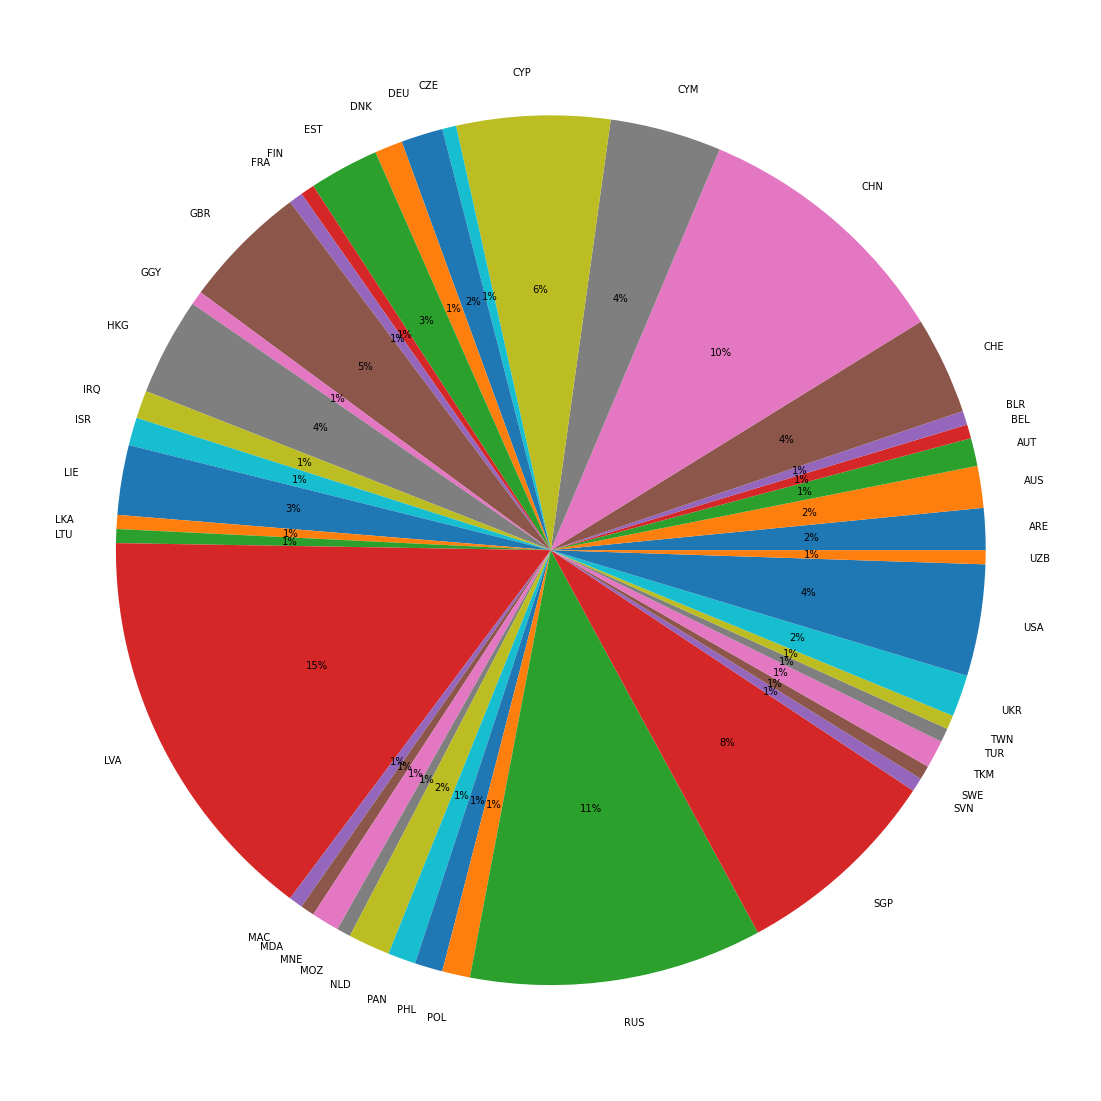

In [397]:
fig, ax = plt.subplots(figsize = (20,20))
mapp3 = mapp2.groupby('originator_iso').agg('count')['beneficiary_iso']
plt.pie(mapp3, labels = mapp3.index, autopct='%.0f%%')
plt.show()

Most of them from Latvia, Russia, Singapore, Cyprus and China

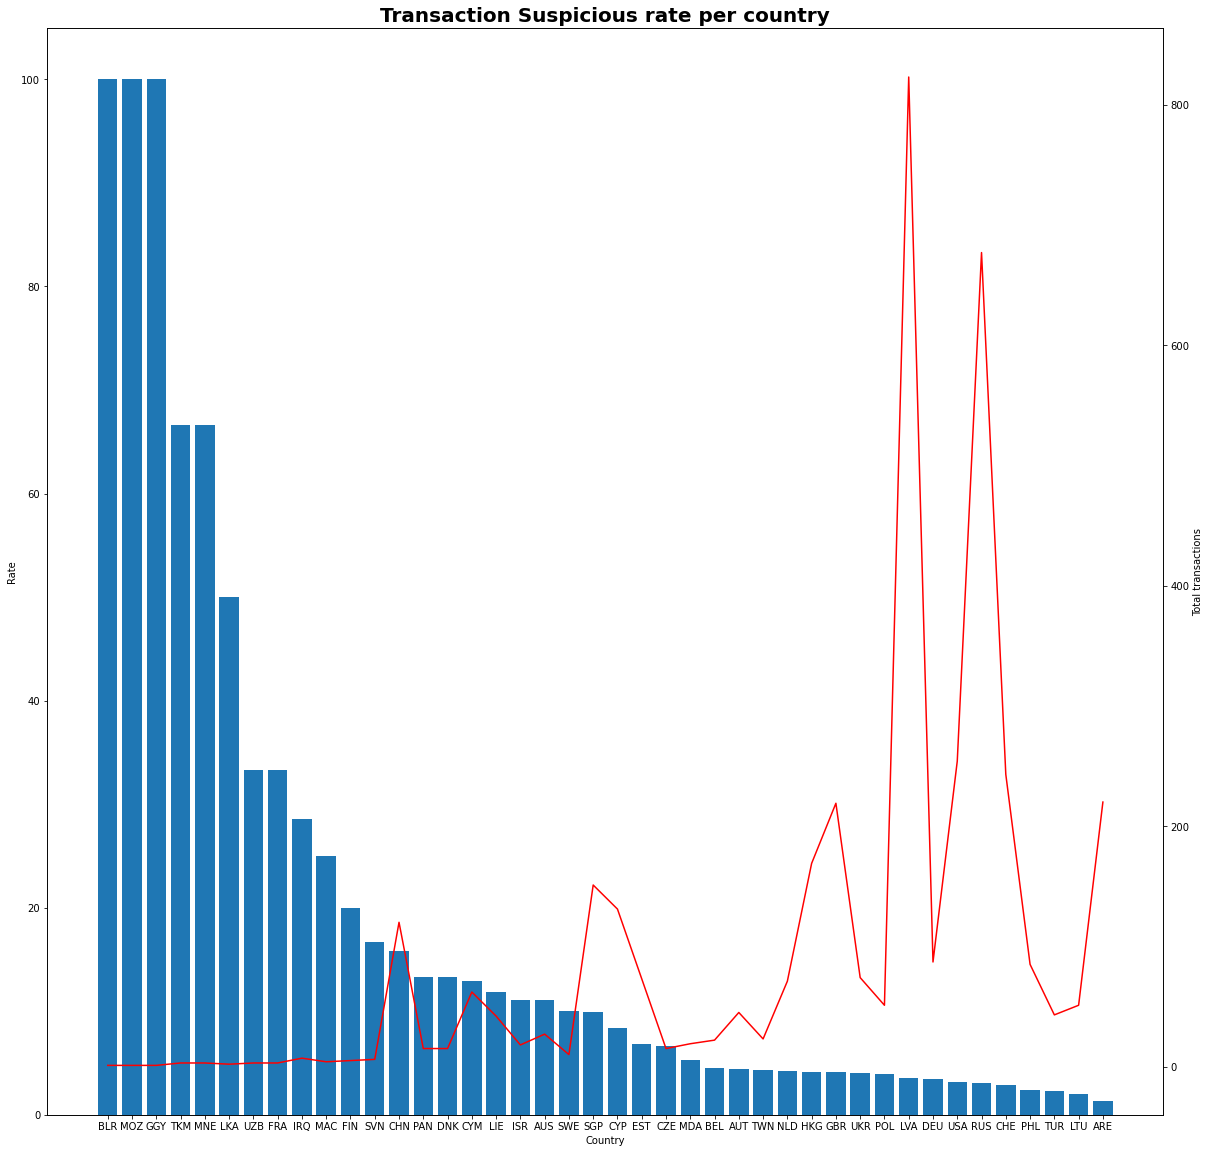

In [440]:
mapp4 = mapp.groupby('originator_iso').agg({'Q':'count','Q1':'sum'})
mapp4['Rate'] =  mapp4.Q1 / mapp4.Q  * 100
mapp4.sort_values(by='Rate', ascending=False, inplace=True)
fig = plt.figure(figsize = (20,20))
ax = fig.add_subplot()
ax.bar(mapp4[mapp4.Rate>0].index,mapp4[mapp4.Rate>0].Rate, label="Rate")
ax2 = ax.twinx()
ax2.plot(mapp4[mapp4.Rate>0].index,mapp4[mapp4.Rate>0].Q, color='red', label="Transactions")
plt.title( 'Transaction Suspicious rate per country',fontweight = "bold", size=20 )
ax.set_xlabel( "Country" )
ax.set_ylabel( "Rate" )
ax2.set_ylabel( "Total transactions" )
plt.show()